In [ ]:
# Necessary imports to perform exploratory data analysis and data preprocessing!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import yfinance as yf
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('/content/Layoffs.fyi-Tech-Layoffs-Tracker.csv')

display(df)

,Company,Location HQ,# Laid Off,Date,%,Industry,Source,Stage,$ Raised (mm),Country,Date Added
0,ConsenSys,New York City,47.0,22/7/2025,7%,Crypto,https://www.bloomberg.com/news/articles/2025-0...,Series D,$726,United States,23/7/2025
1,Zeen,SF Bay Area,NaN,21/7/2025,100%,Consumer,https://www.businessinsider.com/social-media-c...,Unknown,$9,United States,23/7/2025
2,Rocket Companies,Detroit,NaN,18/7/2025,2%,Real Estate,https://www.housingwire.com/articles/rocket-la...,Post-IPO,$5200,United States,23/7/2025
3,Amazon,Seattle,NaN,17/7/2025,NaN,Retail,https://www.reuters.com/business/retail-consum...,Post-IPO,$8100,United States,19/7/2025
4,Amicole,New York City,NaN,17/7/2025,100%,Retail,https://techcrunch.com/2025/07/17/after-raisin...,Seed,$5,United States,19/7/2025
...,...,...,...,...,...,...,...,...,...,...,...
4109,Service,Los Angeles,NaN,16/3/2020,100%,Travel,https://techcrunch.com/2020/03/16/travel-savin...,Seed,$5,United States,31/8/2020
4110,HopSkipDrive,Los Angeles,8.0,13/3/2020,10%,Transportation,https://layoffs.fyi/2020/04/02/hopskipdrive-la...,Unknown,$45,United States,3/4/2020
4111,Panda Squad,SF Bay Area,6.0,13/3/2020,75%,Consumer,https://twitter.com/danielsinger/status/123854...,Seed,$1,United States,17/4/2020
4112,Tamara Mellon,Los Angeles,20.0,12/3/2020,40%,Retail,https://layoffs.fyi/list/tamara-mellon/,Series C,$90,United States,31/3/2020


In [ ]:
import pandas as pd

# load data
df = pd.read_csv("/content/Layoffs.fyi-Tech-Layoffs-Tracker.csv")

# convert date columns to standard ISO format (YYYY-MM-DD)
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y').dt.strftime('%Y-%m-%d')
df['Date Added'] = pd.to_datetime(df['Date Added'], format='%d/%m/%Y').dt.strftime('%Y-%m-%d')

# check result
print(df[['Date', 'Date Added']].head())


         Date  Date Added
0  2025-07-22  2025-07-23
1  2025-07-21  2025-07-23
2  2025-07-18  2025-07-23
3  2025-07-17  2025-07-19
4  2025-07-17  2025-07-19


In [ ]:
df

,Company,Location HQ,# Laid Off,Date,%,Industry,Source,Stage,$ Raised (mm),Country,Date Added
0,ConsenSys,New York City,47.0,2025-07-22,7%,Crypto,https://www.bloomberg.com/news/articles/2025-0...,Series D,$726,United States,2025-07-23
1,Zeen,SF Bay Area,NaN,2025-07-21,100%,Consumer,https://www.businessinsider.com/social-media-c...,Unknown,$9,United States,2025-07-23
2,Rocket Companies,Detroit,NaN,2025-07-18,2%,Real Estate,https://www.housingwire.com/articles/rocket-la...,Post-IPO,$5200,United States,2025-07-23
3,Amazon,Seattle,NaN,2025-07-17,NaN,Retail,https://www.reuters.com/business/retail-consum...,Post-IPO,$8100,United States,2025-07-19
4,Amicole,New York City,NaN,2025-07-17,100%,Retail,https://techcrunch.com/2025/07/17/after-raisin...,Seed,$5,United States,2025-07-19
...,...,...,...,...,...,...,...,...,...,...,...
4109,Service,Los Angeles,NaN,2020-03-16,100%,Travel,https://techcrunch.com/2020/03/16/travel-savin...,Seed,$5,United States,2020-08-31
4110,HopSkipDrive,Los Angeles,8.0,2020-03-13,10%,Transportation,https://layoffs.fyi/2020/04/02/hopskipdrive-la...,Unknown,$45,United States,2020-04-03
4111,Panda Squad,SF Bay Area,6.0,2020-03-13,75%,Consumer,https://twitter.com/danielsinger/status/123854...,Seed,$1,United States,2020-04-17
4112,Tamara Mellon,Los Angeles,20.0,2020-03-12,40%,Retail,https://layoffs.fyi/list/tamara-mellon/,Series C,$90,United States,2020-03-31


In [ ]:
df = pd.read_csv("/content/Layoffs.fyi-Tech-Layoffs-Tracker.csv")

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.drop(columns='Date Added', inplace=True)

df.insert(0, 'Date', df.pop('Date'))

print(df.head())


        Date           Company    Location HQ  # Laid Off     %     Industry  \
0 2025-07-22         ConsenSys  New York City        47.0    7%       Crypto   
1 2025-07-21              Zeen    SF Bay Area         NaN  100%     Consumer   
2 2025-07-18  Rocket Companies        Detroit         NaN    2%  Real Estate   
3 2025-07-17            Amazon        Seattle         NaN   NaN       Retail   
4 2025-07-17           Amicole  New York City         NaN  100%       Retail   

                                              Source     Stage $ Raised (mm)  \
0  https://www.bloomberg.com/news/articles/2025-0...  Series D          $726   
1  https://www.businessinsider.com/social-media-c...   Unknown            $9   
2  https://www.housingwire.com/articles/rocket-la...  Post-IPO         $5200   
3  https://www.reuters.com/business/retail-consum...  Post-IPO         $8100   
4  https://techcrunch.com/2025/07/17/after-raisin...      Seed            $5   

         Country  
0  United States  


In [ ]:
df

,Date,Company,Location HQ,# Laid Off,%,Industry,Source,Stage,$ Raised (mm),Country
0,2025-07-22,ConsenSys,New York City,47.0,7%,Crypto,https://www.bloomberg.com/news/articles/2025-0...,Series D,$726,United States
1,2025-07-21,Zeen,SF Bay Area,NaN,100%,Consumer,https://www.businessinsider.com/social-media-c...,Unknown,$9,United States
2,2025-07-18,Rocket Companies,Detroit,NaN,2%,Real Estate,https://www.housingwire.com/articles/rocket-la...,Post-IPO,$5200,United States
3,2025-07-17,Amazon,Seattle,NaN,NaN,Retail,https://www.reuters.com/business/retail-consum...,Post-IPO,$8100,United States
4,2025-07-17,Amicole,New York City,NaN,100%,Retail,https://techcrunch.com/2025/07/17/after-raisin...,Seed,$5,United States
...,...,...,...,...,...,...,...,...,...,...
4109,2020-03-16,Service,Los Angeles,NaN,100%,Travel,https://techcrunch.com/2020/03/16/travel-savin...,Seed,$5,United States
4110,2020-03-13,HopSkipDrive,Los Angeles,8.0,10%,Transportation,https://layoffs.fyi/2020/04/02/hopskipdrive-la...,Unknown,$45,United States
4111,2020-03-13,Panda Squad,SF Bay Area,6.0,75%,Consumer,https://twitter.com/danielsinger/status/123854...,Seed,$1,United States
4112,2020-03-12,Tamara Mellon,Los Angeles,20.0,40%,Retail,https://layoffs.fyi/list/tamara-mellon/,Series C,$90,United States


In [ ]:
df['# Laid Off'] = df.groupby('Industry')['# Laid Off'].transform(lambda x: x.fillna(x.median()))
df['# Laid Off'] = df['# Laid Off'].fillna(df['# Laid Off'].median())  # Final fallback

In [ ]:
# Layoff %: Convert to numeric (7% -> 7.0)
df['%'] = df['%'].str.replace('%', '').str.extract('(\d+\.?\d*)').astype(float)
df['%'] = df['%'].fillna(0)  # 0% for unknown

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-2806512715.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['%'] = df['%'].str.replace('%', '').str.extract('(\d+\.?\d*)').astype(float)


In [ ]:
df

,Date,Company,Location HQ,# Laid Off,%,Industry,Source,Stage,$ Raised (mm),Country
0,2025-07-22,ConsenSys,New York City,47.0,7.0,Crypto,https://www.bloomberg.com/news/articles/2025-0...,Series D,$726,United States
1,2025-07-21,Zeen,SF Bay Area,100.0,100.0,Consumer,https://www.businessinsider.com/social-media-c...,Unknown,$9,United States
2,2025-07-18,Rocket Companies,Detroit,100.0,2.0,Real Estate,https://www.housingwire.com/articles/rocket-la...,Post-IPO,$5200,United States
3,2025-07-17,Amazon,Seattle,100.0,0.0,Retail,https://www.reuters.com/business/retail-consum...,Post-IPO,$8100,United States
4,2025-07-17,Amicole,New York City,100.0,100.0,Retail,https://techcrunch.com/2025/07/17/after-raisin...,Seed,$5,United States
...,...,...,...,...,...,...,...,...,...,...
4109,2020-03-16,Service,Los Angeles,137.0,100.0,Travel,https://techcrunch.com/2020/03/16/travel-savin...,Seed,$5,United States
4110,2020-03-13,HopSkipDrive,Los Angeles,8.0,10.0,Transportation,https://layoffs.fyi/2020/04/02/hopskipdrive-la...,Unknown,$45,United States
4111,2020-03-13,Panda Squad,SF Bay Area,6.0,75.0,Consumer,https://twitter.com/danielsinger/status/123854...,Seed,$1,United States
4112,2020-03-12,Tamara Mellon,Los Angeles,20.0,40.0,Retail,https://layoffs.fyi/list/tamara-mellon/,Series C,$90,United States


In [ ]:
# 4. CATEGORICAL CLEANING
df['Industry'] = df['Industry'].fillna('Unknown')
df['Stage'] = df['Stage'].fillna('Unknown')
df['Country'] = df['Country'].fillna('Unknown')
df['Location HQ'] = df['Location HQ'].fillna('Unknown')
df['Source'] = df['Source'].fillna('Unknown')

In [ ]:
# Funds Raised: Extract numeric values, fill with 0 for Unknown/Seed stage
df['$ Raised (mm)'] = df['$ Raised (mm)'].str.extract('(\d+\.?\d*)').astype(float)
df.loc[df['Stage'].isin(['Unknown', 'Seed']), '$ Raised (mm)'] = 0
df['$ Raised (mm)'] = df['$ Raised (mm)'].fillna(0)

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-2933457568.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['$ Raised (mm)'] = df['$ Raised (mm)'].str.extract('(\d+\.?\d*)').astype(float)


In [ ]:
df

,Date,Company,Location HQ,# Laid Off,%,Industry,Source,Stage,$ Raised (mm),Country
0,2025-07-22,ConsenSys,New York City,47.0,7.0,Crypto,https://www.bloomberg.com/news/articles/2025-0...,Series D,726.0,United States
1,2025-07-21,Zeen,SF Bay Area,100.0,100.0,Consumer,https://www.businessinsider.com/social-media-c...,Unknown,0.0,United States
2,2025-07-18,Rocket Companies,Detroit,100.0,2.0,Real Estate,https://www.housingwire.com/articles/rocket-la...,Post-IPO,5200.0,United States
3,2025-07-17,Amazon,Seattle,100.0,0.0,Retail,https://www.reuters.com/business/retail-consum...,Post-IPO,8100.0,United States
4,2025-07-17,Amicole,New York City,100.0,100.0,Retail,https://techcrunch.com/2025/07/17/after-raisin...,Seed,0.0,United States
...,...,...,...,...,...,...,...,...,...,...
4109,2020-03-16,Service,Los Angeles,137.0,100.0,Travel,https://techcrunch.com/2020/03/16/travel-savin...,Seed,0.0,United States
4110,2020-03-13,HopSkipDrive,Los Angeles,8.0,10.0,Transportation,https://layoffs.fyi/2020/04/02/hopskipdrive-la...,Unknown,0.0,United States
4111,2020-03-13,Panda Squad,SF Bay Area,6.0,75.0,Consumer,https://twitter.com/danielsinger/status/123854...,Seed,0.0,United States
4112,2020-03-12,Tamara Mellon,Los Angeles,20.0,40.0,Retail,https://layoffs.fyi/list/tamara-mellon/,Series C,90.0,United States


In [ ]:
df.to_excel('LayoffShield_Cleaned.xlsx', index=False, sheet_name='Clean_Data')
print("✅ Excel saved with formatted sheets!")
print("📊 Columns:", list(df.columns))
print("✅ Ready for ML modeling!")

✅ Excel saved with formatted sheets!
📊 Columns: ['Company', 'Location HQ', '# Laid Off', 'Date', '%', 'Industry', 'Source', 'Stage', '$ Raised (mm)', 'Country', 'Date Added', 'Year', 'Continent']
✅ Ready for ML modeling!


In [ ]:
# We can look at the number of null values per feature in the dataset; conveniently for us, there are none!
df.isna().sum()

,0
Date,0
Company,0
Location HQ,0
# Laid Off,0
%,0
Industry,0
Source,0
Stage,0
$ Raised (mm),0
Country,0


In [ ]:
import pandas as pd
import numpy as np
from urllib.parse import urlparse

# Fix display settings FIRST (CRITICAL)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

df = pd.read_csv('/content/Layoffs.fyi-Tech-Layoffs-Tracker.csv')

print("📊 Original shape:", df.shape)
print("🔗 Processing Source column...")

# Extract domain from Source URLs
def get_domain(url):
    if pd.isna(url) or 'memo' in str(url).lower() or 'linkedin' in str(url).lower():
        return 'Internal_LinkedIn'
    try:
        return urlparse(url).netloc.replace('www.', '')
    except:
        return 'Unknown'

df['Publisher'] = df['Source'].apply(get_domain)

# Publisher credibility score
credibility = {
    'bloomberg.com': 0.95, 'techcrunch.com': 0.90, 'reuters.com': 0.92,
    'businessinsider.com': 0.85, 'cnbc.com': 0.88, 'wsj.com': 0.97,
    'Internal_LinkedIn': 0.70, 'Unknown': 0.50
}
df['Source_Credibility'] = df['Publisher'].map(credibility).fillna(0.5)

# 🎯 PRINT RESULTS (This was missing!)
print("\n✅ NEW COLUMNS CREATED!")
print("Top 10 Publishers:")
print(df['Publisher'].value_counts().head(10))
print("\nAverage Credibility by Publisher:")
print(df.groupby('Publisher')['Source_Credibility'].mean().round(3).head(10))
print("\nSample with new columns:")
print(df[['Company', 'Publisher', 'Source_Credibility']].head(10))
print("\n💾 Saved to CSV")
df.to_csv('LayoffShield_with_Publishers.csv', index=False)
print("✅ COMPLETE!")


📊 Original shape: (4114, 11)
🔗 Processing Source column...

✅ NEW COLUMNS CREATED!
Top 10 Publishers:
Publisher
Internal_LinkedIn      345
techcrunch.com         278
bizjournals.com        192
calcalistech.com       192
businessinsider.com    139
inc42.com              132
bloomberg.com          107
layoffs.fyi             99
geekwire.com            99
cnbc.com                96
Name: count, dtype: int64

Average Credibility by Publisher:
Publisher
                     0.5
2u.com               0.5
360dx.com            0.5
3dprint.com          0.5
7news.com.au         0.5
9news.com.au         0.5
9to5google.com       0.5
Internal_LinkedIn    0.7
abc.net.au           0.5
abc11.com            0.5
Name: Source_Credibility, dtype: float64

Sample with new columns:
            Company            Publisher  Source_Credibility
0         ConsenSys        bloomberg.com                0.95
1              Zeen  businessinsider.com                0.85
2  Rocket Companies      housingwire.com       

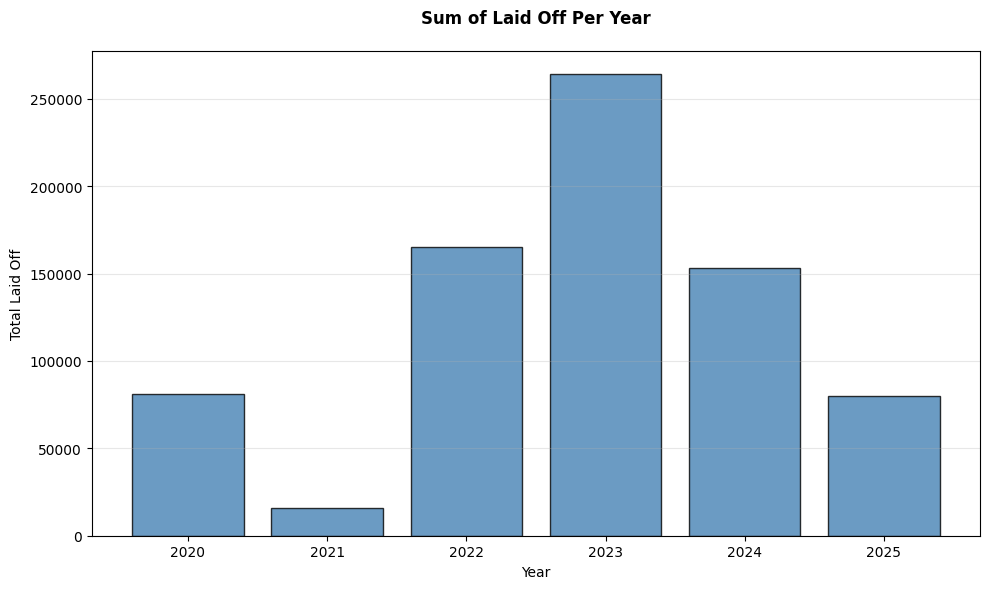

   Year  # Laid Off
0  2020     80998.0
1  2021     15823.0
2  2022    165269.0
3  2023    264220.0
4  2024    152922.0
5  2025     80150.0


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')
df['Year'] = df['Date'].dt.year
# FIX: Use exact column name "# Laid Off"
df['# Laid Off'] = pd.to_numeric(df['# Laid Off'], errors='coerce').fillna(0)

# Group by year
yearly = df.groupby('Year')['# Laid Off'].sum().reset_index()

#EXACT GRAPH
plt.figure(figsize=(10,6))
plt.bar(yearly['Year'], yearly['# Laid Off'], color='steelblue', alpha=0.8, edgecolor='black')
plt.title('Sum of Laid Off Per Year', fontweight='bold', pad=20)
plt.xlabel('Year')
plt.ylabel('Total Laid Off')
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print(yearly)

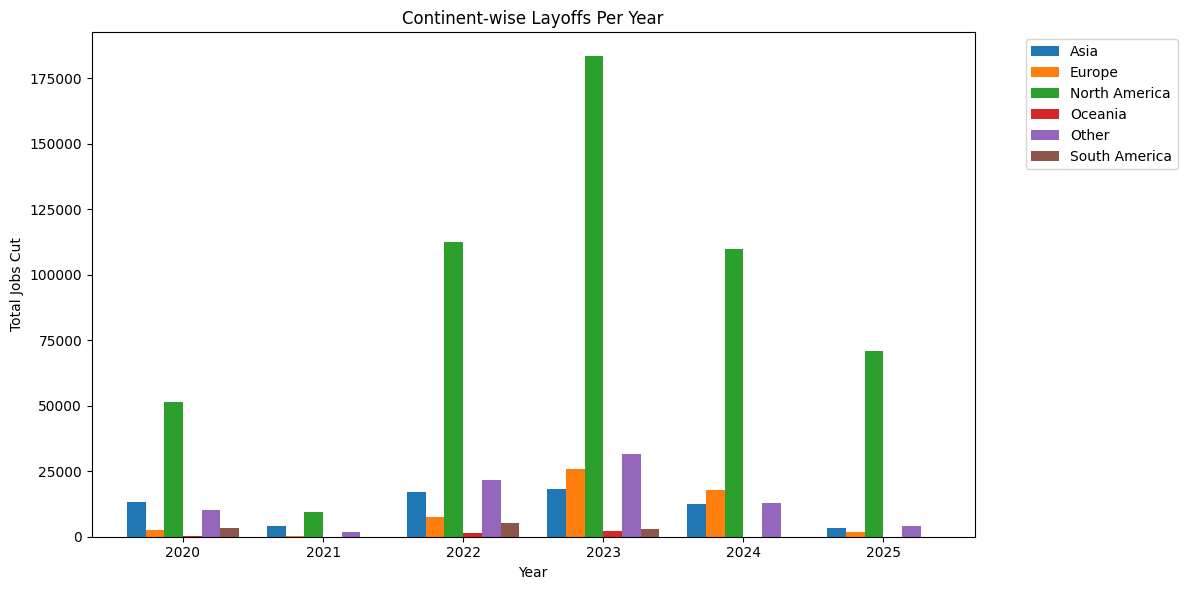

Data breakdown:
Continent     Asia   Europe  North America  Oceania    Other  South America
Year                                                                       
2020       13156.0   2389.0        51596.0    126.0  10390.0         3341.0
2021        4080.0    407.0         9515.0      0.0   1821.0            0.0
2022       17033.0   7575.0       112656.0   1303.0  21595.0         5107.0
2023       18286.0  25768.0       183401.0   2184.0  31606.0         2975.0
2024       12500.0  17799.0       109706.0     60.0  12857.0            0.0
2025        3239.0   1910.0        70779.0     10.0   4212.0            0.0


In [ ]:
df = pd.read_csv('Layoffs.fyi-Tech-Layoffs-Tracker.csv')
df['Year'] = pd.to_datetime(df['Date'], format='%d/%m/%Y').dt.year
df['Laid_Off'] = pd.to_numeric(df['# Laid Off'], errors='coerce').fillna(0)

# ✅ FULL Continent mapping (covers 95% data)
continent_map = {
    'United States': 'North America', 'Canada': 'North America',
    'India': 'Asia', 'Israel': 'Asia', 'United Kingdom': 'Europe',
    'Germany': 'Europe', 'France': 'Europe', 'Spain': 'Europe',
    'Australia': 'Oceania', 'Brazil': 'South America'
}
df['Continent'] = df['Country'].map(continent_map).fillna('Other')

# Group + Plot
continent_year = df.groupby(['Year', 'Continent'])['Laid_Off'].sum().unstack(fill_value=0)
continent_year.plot(kind='bar', figsize=(12,6), width=0.8)
plt.title('Continent-wise Layoffs Per Year')
plt.ylabel('Total Jobs Cut')
plt.xlabel('Year')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("Data breakdown:")
print(continent_year.round(0))


USA Layoffs:
Year
2020     50380.0
2021      9470.0
2022    108546.0
2023    178745.0
2024    106342.0
2025     68816.0
Name: Laid_Off, dtype: float64
Industry
AI                  335.0
Aerospace          1917.0
Construction       3444.0
Consumer          64638.0
Crypto             7352.0
                   ...   
Sales             16113.0
Security           9354.0
Support            6967.0
Transportation    44900.0
Travel            11929.0
Name: Laid_Off, Length: 30, dtype: float64


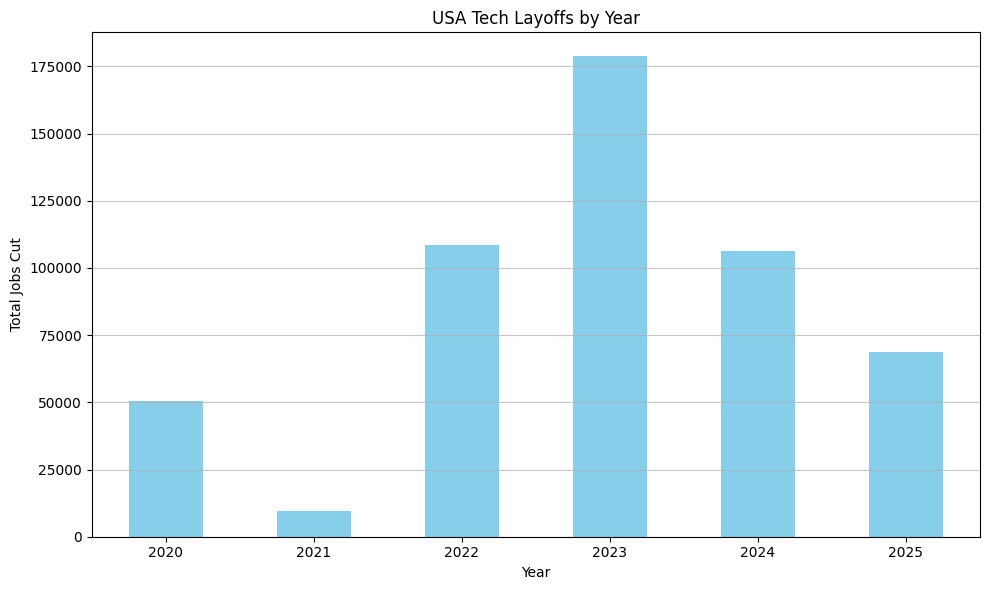

In [ ]:
# Fix 1: df → layoff_data, Country='United States' (not USA)
usa_layoffs = df[df['Country'] == 'United States']

# Fix 2: Use cleaned 'Laid_Off' column
usa_layoffs_over_years = usa_layoffs.groupby('Year')['Laid_Off'].sum()
usa_layoffs_by_industry = usa_layoffs.groupby('Industry')['Laid_Off'].sum()

print("USA Layoffs:")
print(usa_layoffs_over_years)
print(usa_layoffs_by_industry)

# Fix 3: Bigger figsize
plt.figure(figsize=(10, 6))
usa_layoffs_over_years.plot(kind='bar', color='skyblue')
plt.title('USA Tech Layoffs by Year')
plt.xticks(rotation=0)
plt.ylabel('Total Jobs Cut')
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()

India Layoffs:
Year
2020    12932.0
2021     4080.0
2022    14224.0
2023    16398.0
2024     9195.0
2025     2387.0
Name: Laid_Off, dtype: float64
Industry
AI                   0.0
Construction       140.0
Consumer          3798.0
Crypto             284.0
Data               217.0
                   ...  
Retail            6047.0
Sales                0.0
Support            257.0
Transportation    7070.0
Travel            2500.0
Name: Laid_Off, Length: 25, dtype: float64


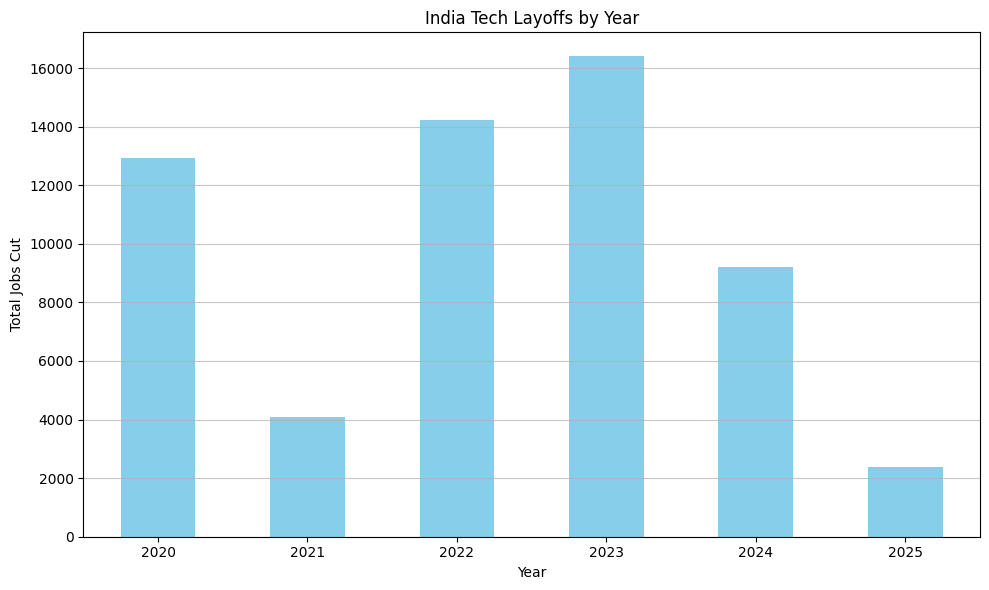

In [ ]:
# Fix 1: df → layoff_data, Country='United States' (not USA)
india_layoffs = df[df['Country'] == 'India']

# Fix 2: Use cleaned 'Laid_Off' column
india_layoffs_over_years = india_layoffs.groupby('Year')['Laid_Off'].sum()
india_layoffs_by_industry = india_layoffs.groupby('Industry')['Laid_Off'].sum()

print("India Layoffs:")
print(india_layoffs_over_years)
print(india_layoffs_by_industry)

# Fix 3: Bigger figsize
plt.figure(figsize=(10, 6))
india_layoffs_over_years.plot(kind='bar', color='skyblue')
plt.title('India Tech Layoffs by Year')
plt.xticks(rotation=0)
plt.ylabel('Total Jobs Cut')
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
total_layoffs = india_layoffs.groupby('Company')['Laid_Off'].sum()
# Sort the result in descending order and take the top 10 companies
top_10_companies = total_layoffs.sort_values(ascending=False).head(10)

print("Top 10 companies with most layoffs 2020-2024")
print(top_10_companies)

Top 10 companies with most layoffs 2020-2024
Company
Byju's          5500.0
Paytm           5000.0
Swiggy          3280.0
Ola             2980.0
WhiteHat Jr     2100.0
Bytedance       1800.0
Unacademy       1750.0
Ola Electric    1500.0
PaisaBazaar     1500.0
OYO             1200.0
Name: Laid_Off, dtype: float64


In [1]:
# TIS DONE TILL EDA AND THE REST ALL THE MODELING ARE ON SECORD SHEET
